In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Sheetal\OneDrive\Desktop\Project_Sheetal\winequality-red.csv")

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [6]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#sns.pairplot(data=df)
df_new=df

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed_acidity'>

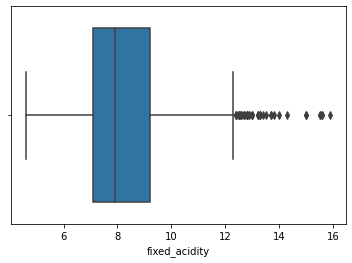

In [9]:
sns.boxplot(df.fixed_acidity)

In [10]:
percentile_25=df.fixed_acidity.quantile(0.25)
percentile_75=df.fixed_acidity.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["fixed_acidity"]=np.where(df.fixed_acidity>upper_limit,upper_limit,np.where(df.fixed_acidity<lower_limit,lower_limit,df.fixed_acidity))
df_new

12.349999999999998
3.95


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
#df2=pd.DataFrame(df[["fixed_acidity","fixed_acidity_new"]])

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed_acidity'>

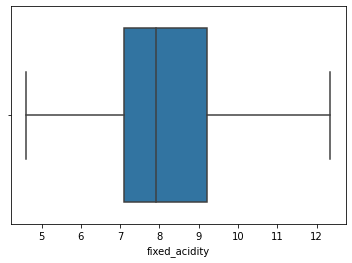

In [12]:
sns.boxplot(df_new.fixed_acidity)

1.0150000000000001
0.015000000000000013


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


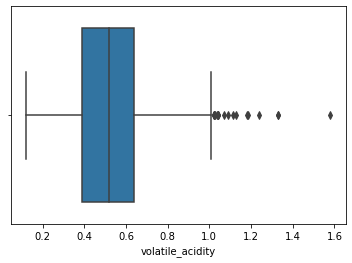

In [13]:
sns.boxplot(df.volatile_acidity)
percentile_25=df.volatile_acidity.quantile(0.25)
percentile_75=df.volatile_acidity.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["volatile_acidity"]=np.where(df.volatile_acidity>upper_limit,upper_limit,np.where(df.volatile_acidity<lower_limit,lower_limit,df.volatile_acidity))


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='volatile_acidity'>

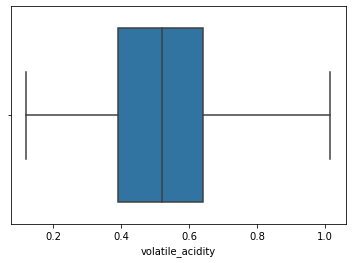

In [14]:
sns.boxplot(df_new.volatile_acidity)

13.5
7.1000000000000005


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


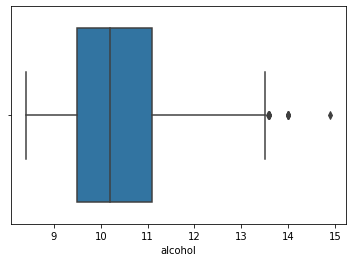

In [15]:
sns.boxplot(df.alcohol)
percentile_25=df.alcohol.quantile(0.25)
percentile_75=df.alcohol.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["alcohol"]=np.where(df.alcohol>upper_limit,upper_limit,np.where(df.alcohol<lower_limit,lower_limit,df.alcohol))


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol'>

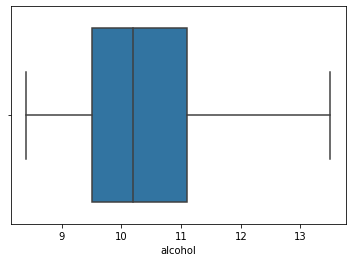

In [16]:
sns.boxplot(df_new["alcohol"])

0.9149999999999999
-0.4049999999999999


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


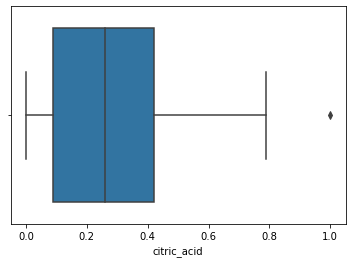

In [17]:
sns.boxplot(df.citric_acid)
percentile_25=df.citric_acid.quantile(0.25)
percentile_75=df.citric_acid.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["citric_acid"]=np.where(df.citric_acid>upper_limit,upper_limit,np.where(df.citric_acid<lower_limit,lower_limit,df.citric_acid))


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric_acid'>

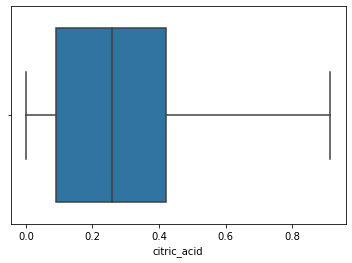

In [18]:
sns.boxplot(df_new.citric_acid)

3.6500000000000004
0.8499999999999996


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


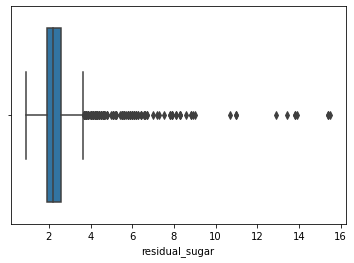

In [19]:
sns.boxplot(df.residual_sugar)
percentile_25=df.residual_sugar.quantile(0.25)
percentile_75=df.residual_sugar.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["residual_sugar"]=np.where(df.residual_sugar>upper_limit,upper_limit,np.where(df.residual_sugar<lower_limit,lower_limit,df.residual_sugar))



C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual_sugar'>

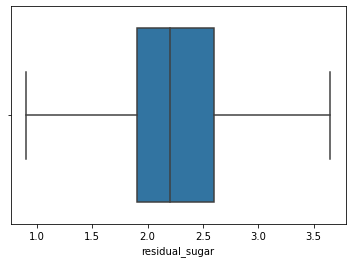

In [20]:
sns.boxplot(df_new.residual_sugar)

0.11999999999999998
0.04000000000000002


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


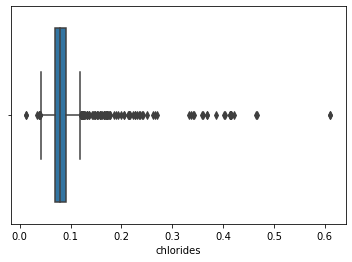

In [21]:
sns.boxplot(df.chlorides)
percentile_25=df.chlorides.quantile(0.25)
percentile_75=df.chlorides.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["chlorides"]=np.where(df.chlorides>upper_limit,upper_limit,np.where(df.chlorides<lower_limit,lower_limit,df.chlorides))



C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chlorides'>

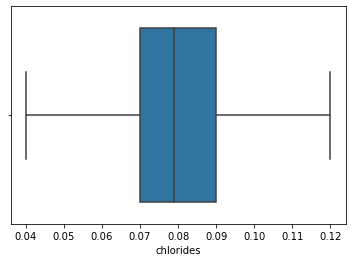

In [22]:
sns.boxplot(df_new.chlorides)

42.0
-14.0


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


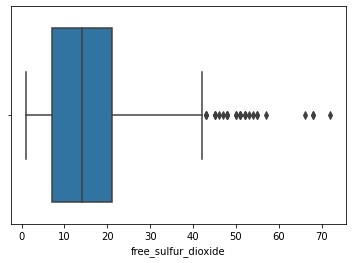

In [23]:
sns.boxplot(df.free_sulfur_dioxide)
percentile_25=df.free_sulfur_dioxide.quantile(0.25)
percentile_75=df.free_sulfur_dioxide.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["free_sulfur_dioxide"]=np.where(df.free_sulfur_dioxide>upper_limit,upper_limit,np.where(df.free_sulfur_dioxide<lower_limit,lower_limit,df.free_sulfur_dioxide))



C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free_sulfur_dioxide'>

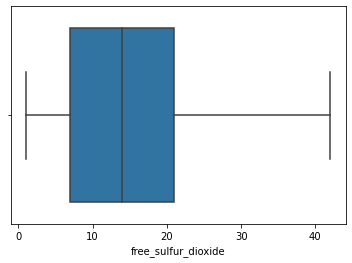

In [24]:
sns.boxplot(df_new.free_sulfur_dioxide)

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sulfur_dioxide'>

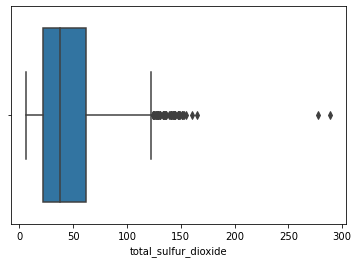

In [25]:
sns.boxplot(df.total_sulfur_dioxide)

In [29]:
percentile_25=df.total_sulfur_dioxide.quantile(0.25)
percentile_75=df.total_sulfur_dioxide.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["total_sulfur_dioxide"]=np.where(df.total_sulfur_dioxide>upper_limit,upper_limit,np.where(df.total_sulfur_dioxide<lower_limit,lower_limit,df.total_sulfur_dioxide))


44.5
-15.5


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sulfur_dioxide'>

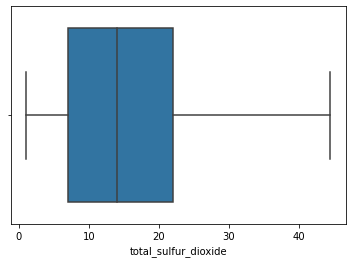

In [30]:
sns.boxplot(df_new.total_sulfur_dioxide)

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density'>

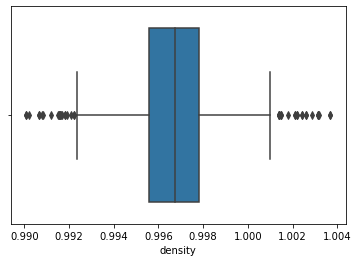

In [31]:
sns.boxplot(df.density)

1.0011875
0.9922475000000001


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


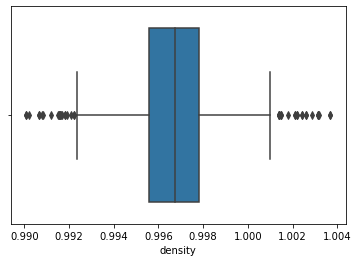

In [32]:
sns.boxplot(df.density)
percentile_25=df.density.quantile(0.25)
percentile_75=df.density.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["density"]=np.where(df.density>upper_limit,upper_limit,np.where(df.density<lower_limit,lower_limit,df.density))



C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density'>

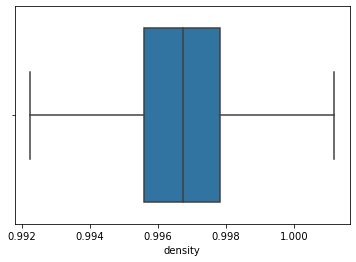

In [33]:
sns.boxplot(df_new.density)

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH'>

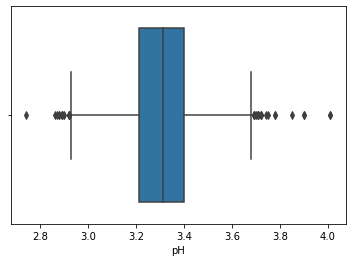

In [34]:
sns.boxplot(df.pH)

In [36]:
percentile_25=df.pH.quantile(0.25)
percentile_75=df.pH.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["pH"]=np.where(df.pH>upper_limit,upper_limit,np.where(df.pH<lower_limit,lower_limit,df.pH))


3.6849999999999996
2.925


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH'>

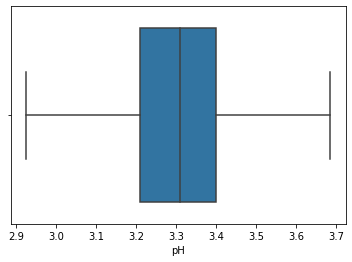

In [37]:
sns.boxplot(df_new.pH)

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sulphates'>

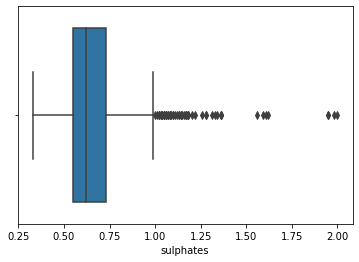

In [38]:
sns.boxplot(df.sulphates)

In [39]:
percentile_25=df.sulphates.quantile(0.25)
percentile_75=df.sulphates.quantile(0.75)
IQR= percentile_75- percentile_25
upper_limit=percentile_75+1.5*IQR
lower_limit=percentile_25-1.5*IQR
print(upper_limit)
print(lower_limit)
#print(df[(df.fixed_acidity > upper_limit) | (df.fixed_acidity <lower_limit)])

df_new["sulphates"]=np.where(df.sulphates>upper_limit,upper_limit,np.where(df.sulphates<lower_limit,lower_limit,df.sulphates))


0.9999999999999999
0.28000000000000014


C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sulphates'>

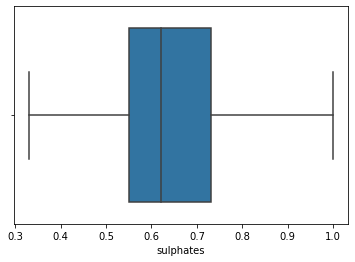

In [40]:
sns.boxplot(df_new.sulphates)

In [41]:
df_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,32.0,0.99547,3.57,0.71,10.2,5


In [42]:
x=df_new.iloc[:,:-1]

In [43]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,32.0,0.99547,3.57,0.71,10.2


In [44]:
y=df_new.iloc[:,-1]

In [45]:
y.shape

(1599,)

In [46]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,11.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,25.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,15.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,17.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,11.0,0.9978,3.51,0.56,9.4


In [47]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=20)

In [49]:
x_train.shape

(1119, 11)

In [50]:
x_test.shape

(480, 11)

In [51]:
LR=LinearRegression()
LR_model=LR.fit(x_train,y_train)
y_pred_test=LR.predict(x_test)


In [52]:
y_test

1508    6
718     5
1370    5
579     6
498     8
       ..
972     7
568     6
1378    6
948     7
1080    6
Name: quality, Length: 480, dtype: int64

In [53]:
np.round(y_pred_test)

array([6., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 5., 6., 5., 6., 5., 5., 6., 5., 6., 6., 6., 5., 6., 5., 6., 6.,
       6., 6., 6., 5., 5., 6., 6., 5., 6., 5., 7., 5., 5., 7., 6., 6., 6.,
       5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6., 5.,
       7., 6., 5., 6., 6., 6., 5., 7., 5., 6., 6., 5., 5., 6., 5., 6., 5.,
       6., 5., 5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 7., 6., 5., 5.,
       7., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5., 5., 5., 6., 5., 5.,
       6., 6., 5., 5., 5., 5., 6., 5., 5., 6., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 6., 6., 5., 6., 6., 5., 6., 7., 6., 5., 5., 6., 5., 5., 5.,
       6., 6., 6., 5., 6., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 5., 6.,
       6., 6., 5., 6., 6., 7., 5., 6., 6., 5., 6., 7., 6., 6., 6., 5., 6.,
       6., 6., 5., 6., 5., 6., 6., 6., 7., 5., 6., 7., 6., 7., 6., 6., 5.,
       6., 5., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5.,
       5., 7., 5., 5., 6.

In [54]:
accuracy=(100-(mean_absolute_percentage_error(y_test,y_pred_test)*100))
accuracy

91.12858190344775

In [55]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1508,7.1,0.27,0.60,2.1,0.074,17.0,17.0,0.99814,3.38,0.72,10.6
718,8.4,0.56,0.04,2.0,0.082,10.0,10.0,0.99760,3.22,0.44,9.6
1370,8.7,0.78,0.51,1.7,0.120,12.0,12.0,0.99623,3.00,1.00,9.2
579,10.6,0.31,0.49,2.2,0.063,18.0,18.0,0.99760,3.14,0.51,9.8
498,10.7,0.35,0.53,2.6,0.070,5.0,5.0,0.99720,3.15,0.65,11.0
...,...,...,...,...,...,...,...,...,...,...,...
972,10.1,0.38,0.50,2.4,0.104,6.0,6.0,0.99643,3.22,0.65,11.6
568,9.8,0.50,0.49,2.6,0.120,5.0,5.0,0.99900,3.31,0.79,10.7
1378,7.2,0.45,0.15,2.0,0.078,10.0,10.0,0.99609,3.29,0.51,9.9
948,8.9,0.12,0.45,1.8,0.075,10.0,10.0,0.99552,3.41,0.76,11.9


In [56]:
LR_model.predict([[7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6]])

C:\Users\Sheetal\Anaconda_new\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.6280357])

In [57]:
y_test


1508    6
718     5
1370    5
579     6
498     8
       ..
972     7
568     6
1378    6
948     7
1080    6
Name: quality, Length: 480, dtype: int64

In [58]:
import pickle
pickle.dump(LR_model,open("model.pkl","wb"))